# Задание 2: EM   
## Мандрикова Анастасия   
Используя пакет mclust произвести процедуру оценивания, обосновать адекватность полученной
модели, визуализировать полученные компоненты.

Warning message:
"package 'mclust' was built under R version 4.0.5"
Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.



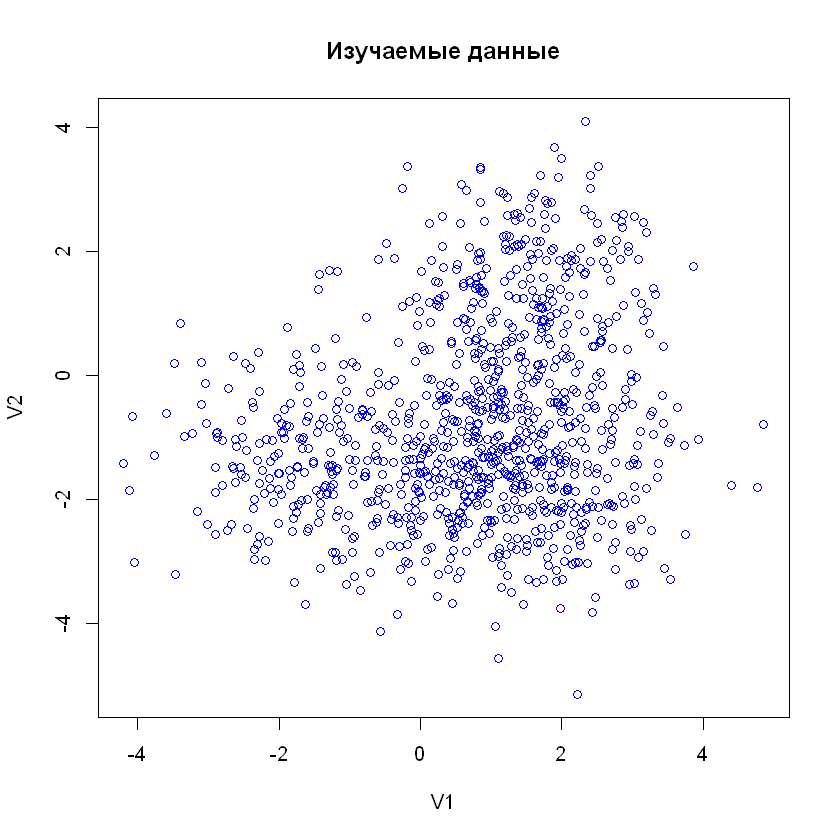

In [1]:
library("mclust")
df <- read.table("tn.txt")
plot(df, col = "blue", main = "Изучаемые данные")

BIC (байесовский информационный критерий) $= 2\ln(L) - \ln(n)k$, где $L$ — функция правдоподобия, $\ln(n)k$ — штраф за количество компонент. Хотим большое значение BIC, а именно функцию правдоподобия побольше, а штраф за количество компонент поменьше.

Bayesian Information Criterion (BIC): 
        EII       VII       EEI       VEI       EVI       VVI       EEE
1 -7557.000 -7557.000 -7563.671 -7563.671 -7563.671 -7563.671 -7530.031
2 -7500.598 -7429.006 -7402.146 -7352.278 -7316.745 -7324.851 -7408.758
3 -7274.216 -7282.260 -7280.681 -7288.716 -7290.754 -7302.239 -7287.290
4 -7296.335 -7310.405 -7301.107 -7314.907 -7317.467 -7332.906 -7307.415
5 -7307.369 -7331.221 -7314.447 -7338.958 -7339.643 -7362.416 -7320.411
6 -7327.657 -7357.701 -7334.571 -7363.930 -7367.473 -7396.676 -7338.870
7 -7346.054 -7383.335 -7352.912 -7390.424 -7391.411 -7426.360 -7358.387
8 -7360.937 -7409.846 -7368.075 -7416.612 -7412.919 -7452.620 -7374.398
9 -7380.070 -7433.419 -7387.223 -7440.457 -7435.712 -7482.700 -7393.709
        VEE       EVE       VVE       EEV       VEV       EVV       VVV
1 -7530.031 -7530.031 -7530.031 -7530.031 -7530.031 -7530.031 -7530.031
2 -7359.171 -7316.263 -7321.380 -7309.739 -7316.647 -7315.952 -7327.459
3 -7295.612 -7295.373 -73

Best BIC values:
             EII,3        EEI,3        VII,3
BIC      -7274.216 -7280.680500 -7282.260191
BIC diff     0.000    -6.464277    -8.043968

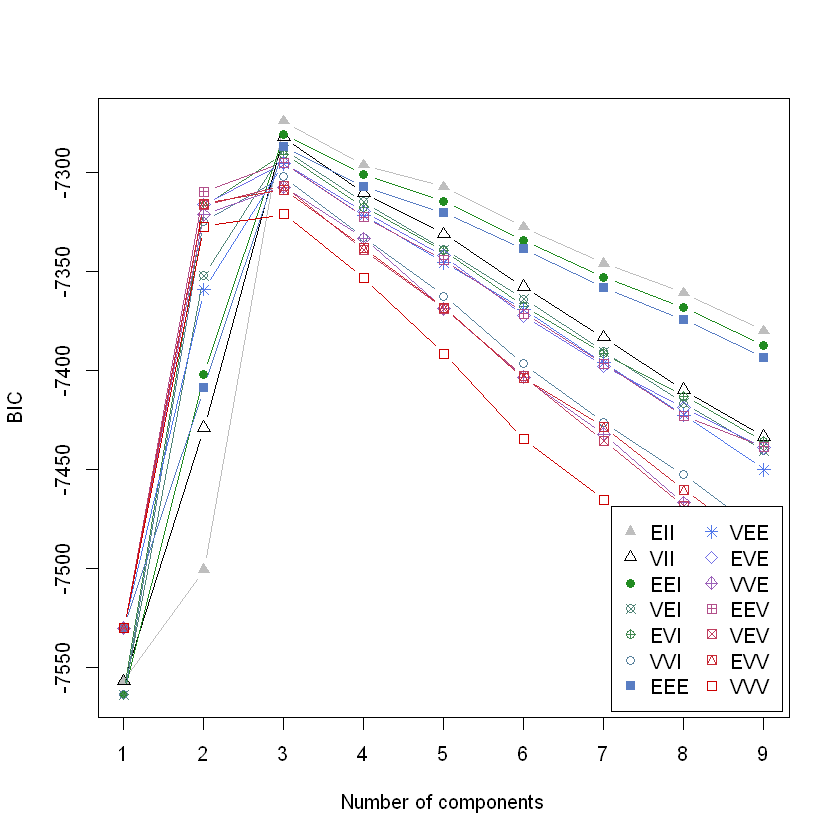

In [2]:
BIC <- mclustBIC(df)
print(BIC)
summary(BIC)
plot(BIC)

Сравним количество оцениваемых параметров у моделей, давших три лучших результата BIC. Хотим выбрать модель с наименьшим количеством параметров. Для каждой модели оценивается $d \times G$ средних и $G-1$ пропорций смеси, в этом случае $d = 2$, $G = 3$ — количество компонент. Те есть для каждой модели оценивается $8$ параметров без учета ковариационной матрицы.

Модели "EII" соответствует ковариационная матрица вида $\lambda I$, где $I$ — единичная матрица, а $\lambda$ — число. Таким образом общее число параметров $9$.

In [3]:
mod1 <- Mclust(df, x = BIC)
Mclust(df, G = 3, modelName = "EII", x = BIC)$df
#mclustModel(df, BIC, 3, "EII")$parameters

[1] 9

Модели "VII" соответствует ковариационная матрица вида $\lambda_k I$, где $k$ — количество компонент. Таким образом общее число параметров $11$.

In [4]:
Mclust(df, G = 3, modelName = "VII", x = BIC)$df
#mclustModel(df, BIC, 3, "VII")$parameters

[1] 11

Модели "EEI" соответствует ковариационная матрица вида $\lambda A$, где $A$ — диагональная матрица. Таким образом общее число параметров $10$.

In [5]:
Mclust(df, G = 3, modelName = "EEI", x = BIC)$df
#mclustModel(df, BIC, 3, "EEI")$parameters

[1] 10

Предпочтительнее выбрать модель "EII".

In [6]:
summary(mod1, parameters = TRUE)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EII (spherical, equal volume) model with 3 components: 

 log-likelihood    n df       BIC       ICL
      -3606.023 1000  9 -7274.216 -7533.589

Clustering table:
  1   2   3 
257 216 527 

Mixing probabilities:
        1         2         3 
0.2601707 0.2276840 0.5121453 

Means:
       [,1]      [,2]      [,3]
V1 1.476971 -1.511515  1.314788
V2 1.380637 -1.397895 -1.512256

Variances:
[,,1]
         V1       V2
V1 1.016191 0.000000
V2 0.000000 1.016191
[,,2]
         V1       V2
V1 1.016191 0.000000
V2 0.000000 1.016191
[,,3]
         V1       V2
V1 1.016191 0.000000
V2 0.000000 1.016191

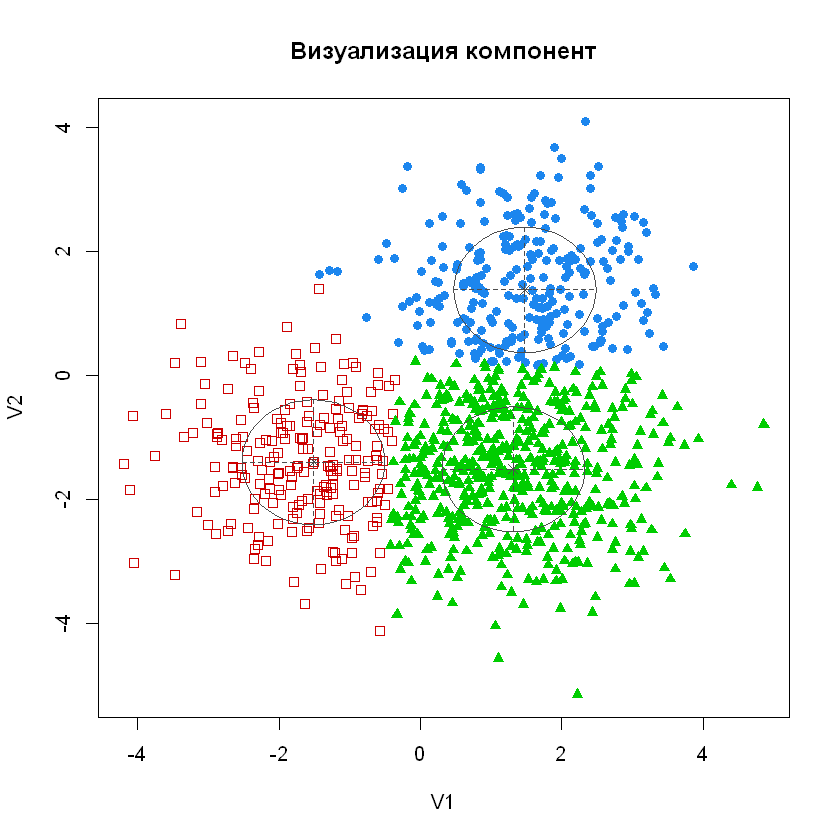

In [7]:
plot(mod1, what = "classification")
title(main = "Визуализация компонент")

Чтобы обосновать адекватность полученной модели, промоделируем случайную величину.

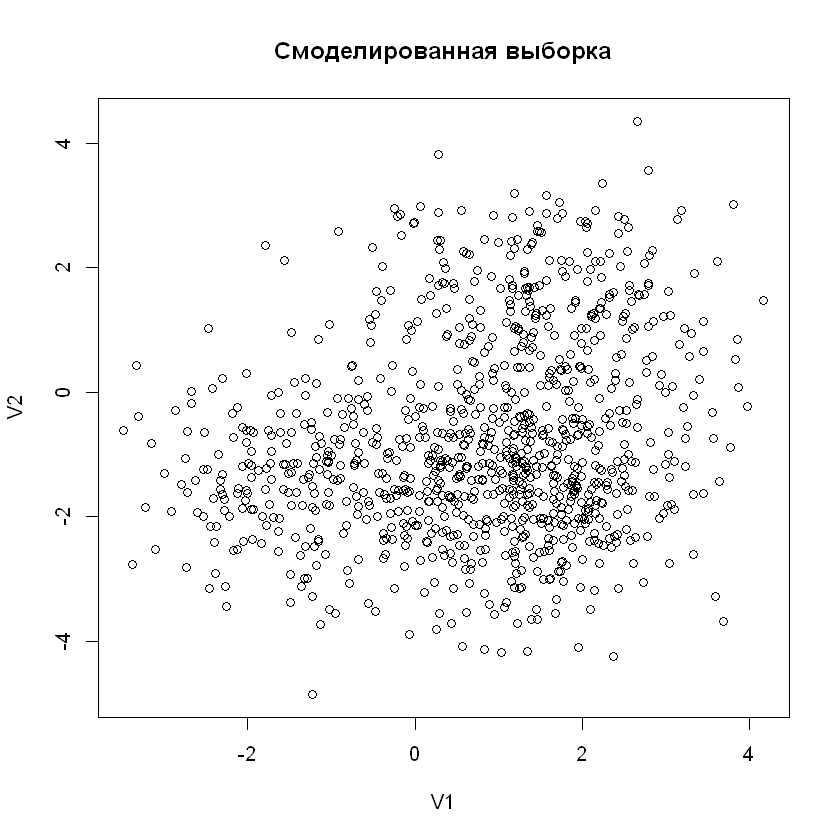

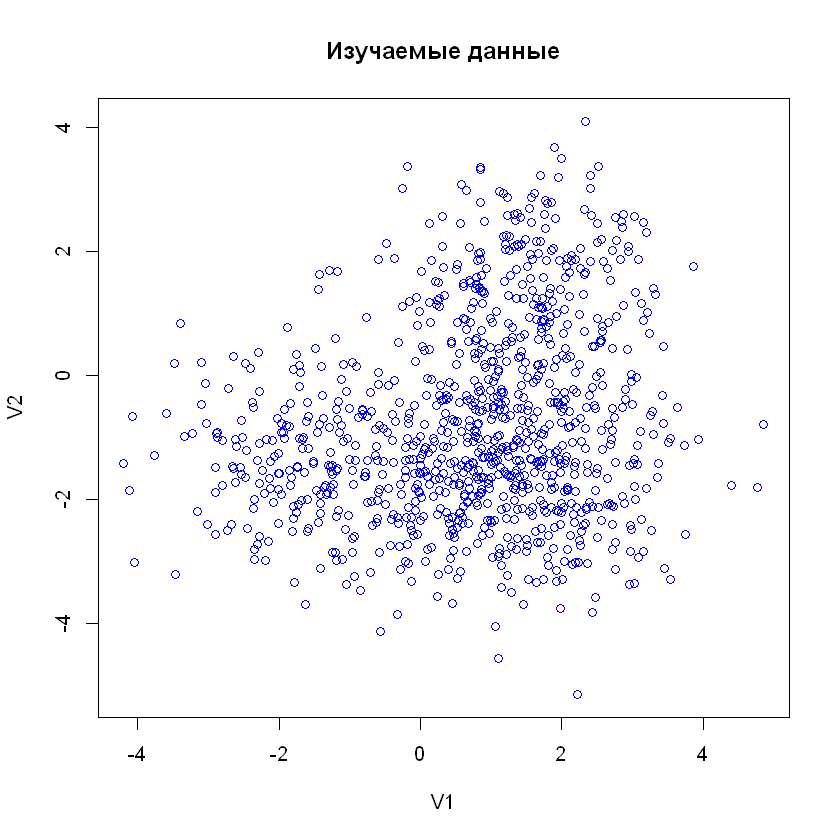

In [8]:
library(MASS)

cov <- mod1$parameters$variance$sigma
pro <- mod1$parameters$pro
m <- mod1$parameters$mean

N <- length(df[[1]])
new.x <- matrix(0, nrow = N, ncol = 2)
for (i in 1:N) {
  alpha <- runif(1)
  if (alpha < pro[2]) {
    new.x[i,] <- mvrnorm(mu = m[,2], Sigma = cov[,,2])
  } 
  else {
    if (alpha < pro[1] + pro[2]){
      new.x[i,] <- mvrnorm(mu = m[,1], Sigma = cov[,,1])
    }
    else{
      new.x[i,] <- mvrnorm(mu = m[,3], Sigma = cov[,,3])
    }
  }
}

plot(new.x, xlab = "V1", ylab = "V2", main = "Смоделированная выборка")
plot(df, col = "blue", main = "Изучаемые данные")